In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [153]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [154]:
df_x=pd.DataFrame(boston.data,columns=boston['feature_names'])
df_y=pd.DataFrame(boston['target'])

In [155]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [156]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [157]:
#creating linear reg. model
lm=linear_model.LinearRegression()

In [158]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=101)


In [159]:
#training
lm.fit(x_train,y_train)

LinearRegression()

In [160]:
#printing coeff.for features of each column
print(lm.coef_)

[[-8.85049752e-02  5.02928536e-02  2.03483110e-02  3.75427054e+00
  -1.77483714e+01  3.24776492e+00  1.20008182e-02 -1.40916141e+00
   2.63880691e-01 -1.03440009e-02 -9.51780874e-01  6.11600491e-03
  -5.97133217e-01]]


In [161]:
y_pred=np.array(lm.predict(x_test))
print(y_pred)

[[40.11113508]
 [27.38971873]
 [16.64700435]
 [16.98475572]
 [31.12920137]
 [32.17489772]
 [38.5534506 ]
 [ 8.16734819]
 [33.48547457]
 [ 7.21877263]
 [30.45404514]
 [13.44085219]
 [16.25354375]
 [17.34359227]
 [25.1543491 ]
 [20.44171457]
 [ 7.30340549]
 [33.13892161]
 [28.41293108]
 [24.58522513]
 [12.44673568]
 [20.25489284]
 [22.48601345]
 [24.42119495]
 [33.92740928]
 [18.63104614]
 [32.32820984]
 [18.67352155]
 [27.36115374]
 [34.46174375]
 [19.84089751]
 [18.40373436]
 [37.15821555]
 [44.94610923]
 [30.27513579]
 [22.00760066]
 [16.0127978 ]
 [18.16328402]
 [ 4.33298095]
 [30.93867591]
 [24.15262229]
 [17.17277775]
 [34.10334259]
 [13.89433899]
 [17.46893797]
 [25.30893285]
 [30.35309561]
 [16.10339452]
 [26.91513852]
 [22.98227547]
 [32.14815603]
 [37.34454946]
 [22.90074019]
 [17.56894548]
 [30.18430234]
 [ 0.10360753]
 [20.22573888]
 [16.82248142]
 [23.15487984]
 [21.16760077]
 [30.5734497 ]
 [ 3.15502223]
 [15.92340596]
 [20.06361892]
 [10.43608925]
 [24.28745773]
 [24.00445

In [162]:
y_test=np.array(y_test)
print(y_test)

[[50. ]
 [36.2]
 [11.7]
 [14.9]
 [30.8]
 [36.1]
 [50. ]
 [13.2]
 [41.3]
 [ 8.5]
 [23.5]
 [13.3]
 [20.2]
 [18.6]
 [18.5]
 [27.9]
 [10.4]
 [28.5]
 [28.4]
 [23.1]
 [12.8]
 [21.7]
 [11.9]
 [29.6]
 [37.3]
 [19.9]
 [29. ]
 [18. ]
 [50. ]
 [34.6]
 [24.3]
 [18.2]
 [44. ]
 [50. ]
 [30.7]
 [22.6]
 [14.1]
 [14.5]
 [ 8.4]
 [32.5]
 [24.3]
 [20.6]
 [43.8]
 [11.5]
 [19.9]
 [23.8]
 [28.7]
 [17.8]
 [23.9]
 [33. ]
 [31.5]
 [21.9]
 [17.4]
 [15. ]
 [34.7]
 [13.8]
 [20.4]
 [19.5]
 [22.4]
 [16.8]
 [32.9]
 [14.4]
 [27.5]
 [20.1]
 [ 8.3]
 [27.5]
 [25. ]
 [17.1]
 [10.9]
 [18.5]
 [19.2]
 [20.7]
 [17. ]
 [19.2]
 [27.1]
 [15.6]
 [50. ]
 [14.4]
 [22.8]
 [ 7.2]
 [15.6]
 [19.5]
 [29.4]
 [15.4]
 [16.5]
 [19.8]
 [21.4]
 [32. ]
 [24.7]
 [16.1]
 [11.3]
 [15.6]
 [25. ]
 [31. ]
 [ 5. ]
 [50. ]
 [14.6]
 [31.6]
 [ 5. ]
 [20.9]
 [31.7]
 [20.1]
 [22.3]
 [22.8]
 [19.6]
 [23.2]
 [23.8]
 [35.4]
 [44.8]
 [31.6]
 [19.4]
 [48.3]
 [24.7]
 [20. ]
 [32.7]
 [22. ]
 [22.5]
 [29.1]
 [23.8]
 [24.1]
 [13.4]
 [16.2]
 [20.9]
 [32.4]
 [24.7]


In [163]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

28.547585271468172


In [164]:
print(np.mean(y_pred-y_test)**2)

0.3485437632645044


In [165]:
print(y_pred.shape,y_test.shape)

(152, 1) (152, 1)


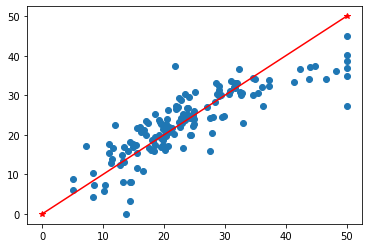

In [166]:
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],'*-r')

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

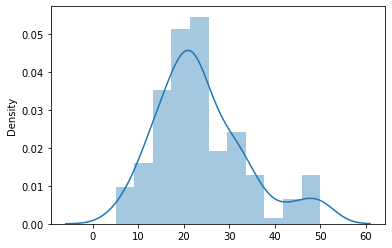

In [167]:
sns.distplot(y_test)